In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.express as px
import warnings

In [4]:
apps = pd.read_csv("apps.csv")
apps

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9654,10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
9655,10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100+,Free,0,Everyone,Education,"July 6, 2018",1,4.1 and up
9656,10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1,2.2 and up
9657,10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [5]:
apps.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
apps.isna().sum()

Unnamed: 0           0
App                  0
Category             0
Rating            1463
Reviews              0
Size              1227
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [7]:
apps['Installs'].items

<bound method Series.items of 0           10,000+
1          500,000+
2        5,000,000+
3       50,000,000+
4          100,000+
           ...     
9654         5,000+
9655           100+
9656         1,000+
9657         1,000+
9658    10,000,000+
Name: Installs, Length: 9659, dtype: object>

In [8]:
#Removing unwanted symbols from the dataset 
chars_to_remove = [',','$','+']
ins = ['Installs','Price']
for col in ins:
    for char in chars_to_remove:
        apps[col] = apps[col].astype(str).str.replace(char,'')
    apps[col] = pd.to_numeric(apps[col])  

In [9]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   int64  
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   float64
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(3), int64(3), object(8)
memory usage: 1.0+ MB


In [10]:
#Need to convert installs and price to float datatype
apps['Installs'] = apps['Installs'].astype('float')
apps['Price'] = apps['Price'].astype('float')
print(apps.dtypes)

Unnamed: 0          int64
App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs          float64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object


In [11]:
#Data analysis                  
# num_categories = len(apps['Category'].unique())
# print('Number of categories = ', num_categories)
# num_apps_in_category = apps['Category'].value_counts().sort_values(ascending = False)

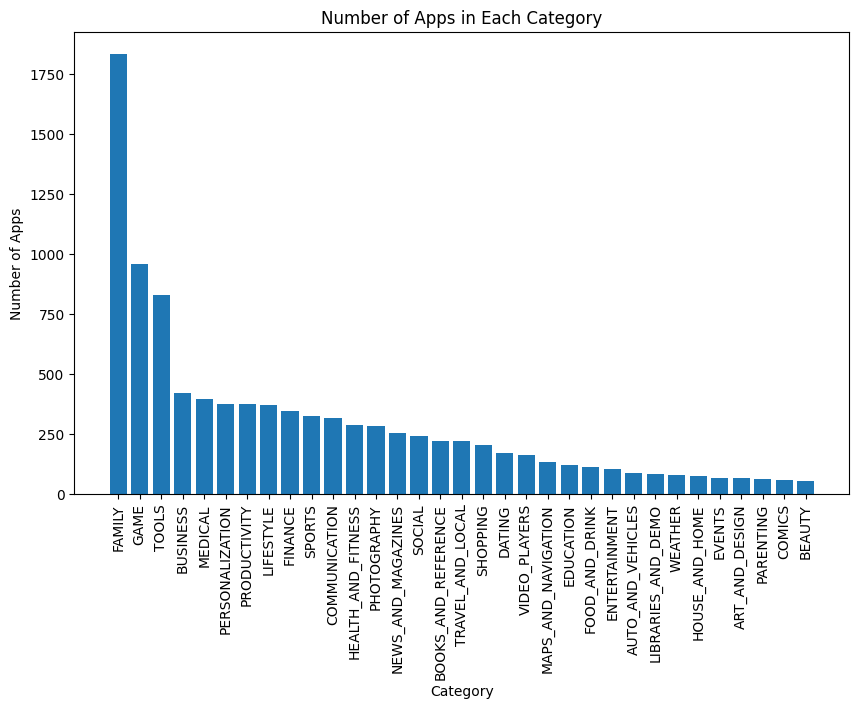

In [12]:
num_apps = apps['Category'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
plt.bar(num_apps.index, num_apps.values)
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Number of Apps')
plt.title('Number of Apps in Each Category')
plt.show()

Average app rating =  4.173243045387994


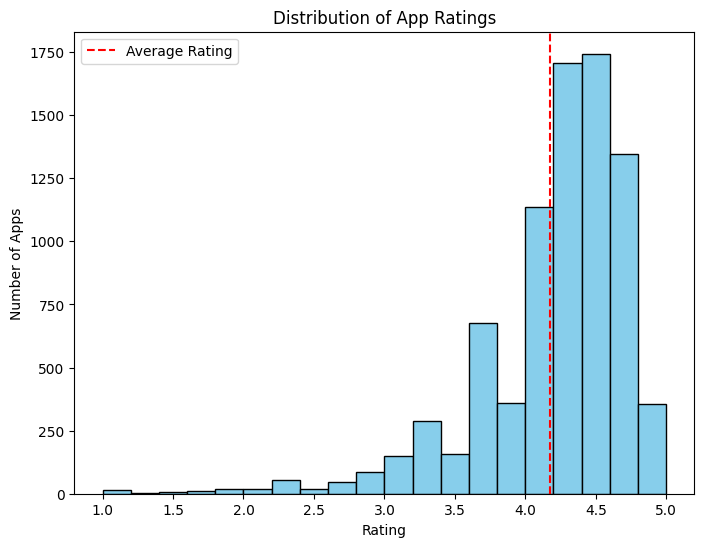

In [13]:
#Analysis on Rating
import matplotlib.pyplot as plt
avg_app_rating = apps['Rating'].mean()
print('Average app rating = ', avg_app_rating)
plt.figure(figsize=(8, 6))
plt.hist(apps['Rating'], bins=20, color='skyblue', edgecolor='black')

# Adding a vertical dashed line to indicate the average app rating
plt.axvline(x=avg_app_rating, color='red', linestyle='--', label='Average Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Apps')
plt.title('Distribution of App Ratings')
plt.legend()
plt.show()


In [14]:
#Popularity
apps_with_size_and_rating_present = apps[(~apps['Rating'].isnull()) & (~apps['Size'].isnull())]
dfa=apps_with_size_and_rating_present['Category'].value_counts().to_frame(name = 'popularity')
print(dfa[dfa['popularity']>=250].reset_index())

          Category  popularity
0           FAMILY        1512
1             GAME         832
2            TOOLS         626
3  PERSONALIZATION         276
4        LIFESTYLE         269
5          MEDICAL         266
6          FINANCE         258


In [15]:
popular_apps = apps[apps["Category"].isin(['GAME', 'FAMILY', 'PHOTOGRAPHY','MEDICAL', 'TOOLS', 'FINANCE','LIFESTYLE','BUSINESS'])]
apps_above_100 = popular_apps[['Category', 'Price']][popular_apps['Price'] > 100]  
apps_above_100

,Category,Price
3327,FAMILY,399.99
3465,LIFESTYLE,399.99
3469,LIFESTYLE,400.00
4396,LIFESTYLE,399.99
4398,FAMILY,399.99
4399,LIFESTYLE,299.99
4400,FINANCE,399.99
4401,LIFESTYLE,379.99
4402,FINANCE,399.99
4403,FINANCE,399.99


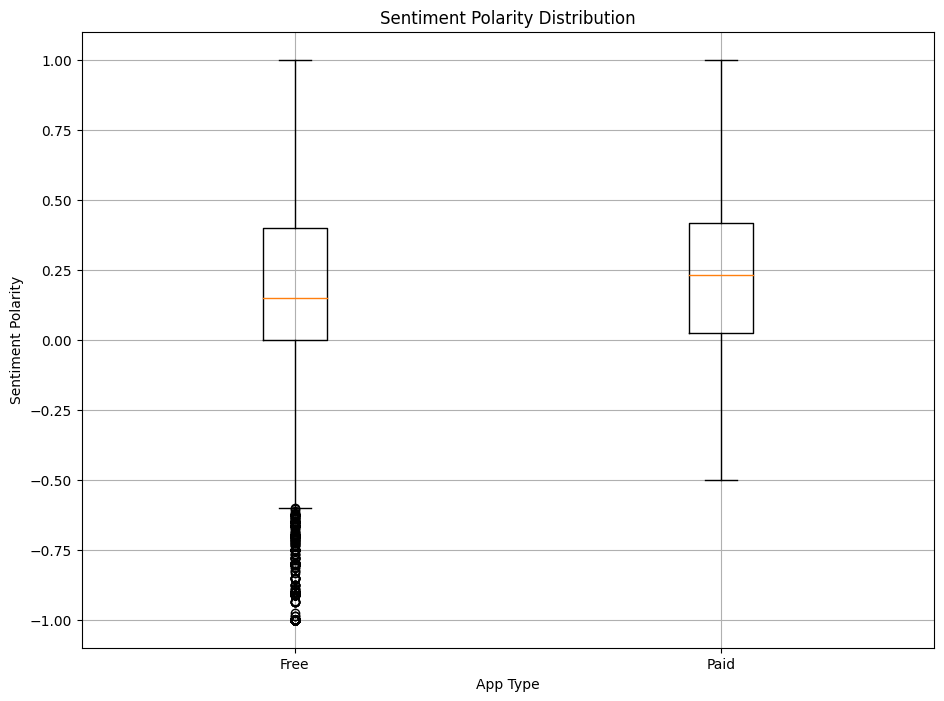

In [19]:
#Sentiment analysis
reviews_df = pd.read_csv('user_reviews.csv')
merged_df = merged_df.dropna(subset=['Sentiment', 'Translated_Review'])
plt.figure(figsize=(11, 8))
plt.boxplot([merged_df[merged_df['Type'] == 'Free']['Sentiment_Polarity'], 
             merged_df[merged_df['Type'] == 'Paid']['Sentiment_Polarity']],
            labels=['Free', 'Paid'])
plt.xlabel('App Type')
plt.ylabel('Sentiment Polarity')
plt.title('Sentiment Polarity Distribution')
plt.grid(True)
plt.show()